In [2]:
# Basic module
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pandas as pd
# PyTorch
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

# Custom
from utils.read_file import *
from utils.TimeSeriesDataset import *
from utils.preprocess_tool import *
from utils.testing_tool import *

In [3]:
TEST_DATA_PATH = '36_TrainingData/'
TEST_FORMAT = '36_TestSet_SubmissionTemplate/upload(no answer).csv'
device = "cuda" if torch.cuda.is_available() else "cpu"

In [4]:
#### load the right data
location_to_days = find_targets(read_csv(TEST_FORMAT))

filter_data = process_filter_data(TEST_DATA_PATH, location_to_days)

combinded_list = []
for ds in filter_data:
    l, d = ds 
    if isinstance(d, str):
        print(f'{ds}')
        continue
    combinded_list.append(d)

combinded_filter_data = pd.concat(combinded_list, ignore_index=True)

combinded_filter_data = combinded_filter_data.drop(columns=['DateOnly'])

loc : 01
loc : 02
loc : 03
loc : 04
loc : 05
loc : 06
loc : 07
loc : 08
loc : 09
loc : 10
loc : 11
loc : 12
loc : 13
loc : 14
loc : 15
loc : 16
loc : 17


In [5]:
# find yesterday data

In [5]:

normalized_data = normalize(combinded_filter_data)
normalized_data = normalized_data.drop(columns=['Power(mW)'])
normalized_data = convert_to_every10mins(normalized_data).reset_index()
normalized_data

,DateTime,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux)
0,2024-01-06 06:20:00,0.0000,0.102902,0.544821,0.026994,1.0,0.000440
1,2024-01-06 06:30:00,0.0000,0.091953,0.545974,0.029935,1.0,0.002615
2,2024-01-06 06:40:00,0.0000,0.064116,0.551988,0.029718,1.0,0.007178
3,2024-01-06 06:50:00,0.0000,0.130079,0.559054,0.032972,1.0,0.013968
4,2024-01-06 07:00:00,0.0000,0.049077,0.562636,0.039262,1.0,0.043700
...,...,...,...,...,...,...,...
2726,2024-10-28 08:10:00,0.4375,0.000000,0.247946,0.359566,1.0,0.066647
2727,2024-10-28 08:20:00,0.4375,0.000000,0.252908,0.372082,1.0,0.083304
2728,2024-10-28 08:30:00,0.4375,0.000000,0.251520,0.379257,1.0,0.087834
2729,2024-10-28 08:40:00,0.4375,0.000000,0.253237,0.379718,1.0,0.094448


In [6]:
# check the lenght of the predict data if not proper them slice to be the same as eln 60

normalized_data = normalized_data.drop(columns=['DateTime'])
Xs = create_x_sequences(normalized_data, 60)

X = []
for x in Xs:
    if len(x) != 60:
        print(len(x))
        continue
    X.append(np.array(x))

#      X.extend(np.array(x))  
#len(Xs)#should be 60

# day_df = split_by_9am_to_next_9am(normalized_data)

# Xs = []
# for date, d_df in day_df.items():
#         x_window = create_x_sequences(d_df , 500)
#         if x_window:
#                 Xs.append(x_window)
        
# X = []
# for x in Xs:
#         X.extend(np.array(x))  
#         len(X)#should be 50
X[0]

array([[0.00000000e+00, 1.02902375e-01, 5.44820535e-01, 2.69944565e-02,
        1.00000000e+00, 4.39609990e-04],
       [0.00000000e+00, 9.19525066e-02, 5.45974367e-01, 2.99349241e-02,
        1.00000000e+00, 2.61456350e-03],
       [0.00000000e+00, 6.41160950e-02, 5.51988170e-01, 2.97180043e-02,
        1.00000000e+00, 7.17765347e-03],
       [0.00000000e+00, 1.30079156e-01, 5.59053566e-01, 3.29718004e-02,
        1.00000000e+00, 1.39681259e-02],
       [0.00000000e+00, 4.90765172e-02, 5.62635557e-01, 3.92624729e-02,
        1.00000000e+00, 4.37000651e-02],
       [0.00000000e+00, 9.10290237e-02, 5.62898455e-01, 7.59219089e-02,
        1.00000000e+00, 9.99109210e-02],
       [0.00000000e+00, 7.28232190e-02, 5.66217548e-01, 1.22776573e-01,
        1.00000000e+00, 1.12602919e-01],
       [0.00000000e+00, 7.84960422e-02, 5.71114032e-01, 1.63340564e-01,
        1.00000000e+00, 1.64698042e-01],
       [0.00000000e+00, 4.27440633e-02, 5.76503451e-01, 1.84381779e-01,
        9.40945847e-01, 

In [7]:
X_torch = torch.tensor(np.array(X)).float()
X_torch.shape

torch.Size([2671, 60, 6])

In [17]:
BATCH_SIZE = 32

dataset = TimeSeriesDataset(X_torch, X_torch)
test_loader = DataLoader(dataset , batch_size=BATCH_SIZE, shuffle=True)

for batch_x in test_loader:
    print(batch_x)
    break
len(test_loader) #84*32

[tensor([[[0.5625, 0.0000, 0.2897, 0.3441, 1.0000, 0.0458],
         [0.5625, 0.0000, 0.2880, 0.3458, 1.0000, 0.0512],
         [0.5625, 0.0000, 0.2892, 0.3501, 1.0000, 0.0593],
         ...,
         [0.4000, 0.0000, 0.2796, 0.3952, 0.8775, 0.1411],
         [0.4000, 0.0000, 0.2786, 0.4050, 0.8351, 0.1695],
         [0.4000, 0.0000, 0.2746, 0.4191, 0.7814, 0.1547]],

        [[0.5625, 0.0000, 0.2899, 0.3823, 0.9987, 0.1029],
         [0.5625, 0.0000, 0.2873, 0.4074, 0.9896, 0.1147],
         [0.5625, 0.0000, 0.2883, 0.4639, 0.8309, 0.1476],
         ...,
         [0.0000, 0.0000, 0.2441, 0.2774, 1.0000, 0.0464],
         [0.0000, 0.0000, 0.2394, 0.2800, 1.0000, 0.0477],
         [0.0000, 0.0000, 0.2445, 0.2829, 1.0000, 0.0314]],

        [[0.5625, 0.1591, 0.4081, 0.2719, 0.9660, 0.0357],
         [0.5625, 0.1810, 0.4157, 0.2717, 0.9695, 0.0404],
         [0.5625, 0.1706, 0.4195, 0.2726, 0.9660, 0.0375],
         ...,
         [0.8750, 0.0000, 0.4420, 0.2465, 0.9542, 0.0122],
         

84

In [18]:
class LSTMNet(nn.Module):
    def __init__(self, input_size, hidden_size, n_layers, drop_prob=0.2):
        super(LSTMNet, self).__init__()
        self.hidden_size = hidden_size
        self.n_layers = n_layers
        
        self.lstm = nn.LSTM(input_size, hidden_size, n_layers, 
                            batch_first=True, dropout=drop_prob)
        
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.n_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.n_layers, batch_size, self.hidden_size).to(device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out)
        # out = self.fc(out[:, -1, :])
        return out

In [19]:
loaded_model = LSTMNet(6,8,1)
loaded_model.eval(), loaded_model.load_state_dict(torch.load('LSTM_model_s3v1_nn6_8_1.pt'))

/Users/harris/anaconda3/envs/gr/lib/python3.11/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


(LSTMNet(
   (lstm): LSTM(6, 8, batch_first=True, dropout=0.2)
   (fc): Linear(in_features=8, out_features=1, bias=True)
 ),
 <All keys matched successfully>)

In [64]:
log = []
output = []
answer = []
loss_fn = nn.MSELoss()

def test_one_epoch():
    # loaded_model.train(False)
    loaded_model.eval()
    running_loss = 0.0
    
    for batch_i, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        with torch.no_grad():
            prediction = loaded_model(x_batch)
            prediction = torch.relu(prediction)###prevent negative prediciton
            
            loss = loss_fn(prediction[:, :, :], y_batch[:, :, :])
            running_loss += loss.item()

            output.append(prediction[:, :, :].cpu().numpy().flatten() )
            answer.append(y_batch[:, :, :].cpu().numpy().flatten() )
            
            
            if batch_i % 82 == 0:
                log.append((prediction[:, :, :],y_batch[:, :, :]))
    # Write average loss to the file
    
    print(f'Avg_Loss: {running_loss/ len(test_loader)}, Total_Loss: {running_loss}')
    

In [65]:
test_one_epoch()

Avg_Loss: 353801.88504464284, Total_Loss: 29719358.34375


In [66]:
len(output[0]), len(output)

(1920, 84)

In [ ]:
combined_output = []

for arr in output:
    combined_output.extend(arr.tolist())

len(combined_output)
#combined_output

[272.3091125488281,
 179.0713653564453,
 201.5431365966797,
 494.3631591796875,
 282.0333557128906,
 302.90576171875,
 53.17106628417969,
 285.36944580078125,
 46.20098876953125,
 0.0,
 218.276611328125,
 197.8079376220703,
 437.75762939453125,
 0.0,
 92.4920425415039,
 136.97752380371094,
 276.28240966796875,
 97.14401245117188,
 114.31745147705078,
 160.9116668701172,
 242.2515411376953,
 268.2122497558594,
 676.832763671875,
 114.1147232055664,
 0.0,
 265.858154296875,
 455.00921630859375,
 1111.6129150390625,
 753.4711303710938,
 1086.9906005859375,
 497.80462646484375,
 286.0770568847656,
 85.21163177490234,
 363.0466613769531,
 718.4132080078125,
 1344.7939453125,
 831.1724853515625,
 1282.8746337890625,
 176.79112243652344,
 77.379150390625,
 291.869384765625,
 315.42254638671875,
 325.44317626953125,
 397.1203918457031,
 503.1279296875,
 296.61895751953125,
 220.13778686523438,
 154.64418029785156,
 314.64300537109375,
 231.91610717773438,
 494.038818359375,
 400.637939453125,


In [71]:
import csv
output

# Open the CSV file for reading
with open('upload_format.csv', mode='r') as infile:
    reader = list(csv.reader(infile))  # Read the whole file into a list of rows

# Ensure 'combined_output' and the rows have matching lengths
for i, row in enumerate(reader):
    if i < len(combined_output):  # Avoid index errors if there are more rows than values in combined_output
        row.append(f"{combined_output[i]:.2f}")  # Append the value from combined_output to the row, formatted to 2 decimal places


# Open the CSV file for writing
with open('upload.csv', mode='w', newline='') as outfile:
    writer = csv.writer(outfile)
    writer.writerows(reader)

print("Last column formatted to 2 decimal places.")

Last column formatted to 2 decimal places.


In [ ]:
# import csv

# with open('output.csv', 'w', newline='') as f:
#     writer = csv.writer(f)
#     writer.writerow(['Prediction', 'GroundTruth'])  # Write headers for both columns
    
#     # Write predictions and ground truth in the same row
#     for pred, ans in zip(output, answer):
#         for p, a in zip(pred, ans):
#             writer.writerow([f'{p:.2f}', f'{a:.2f}'])

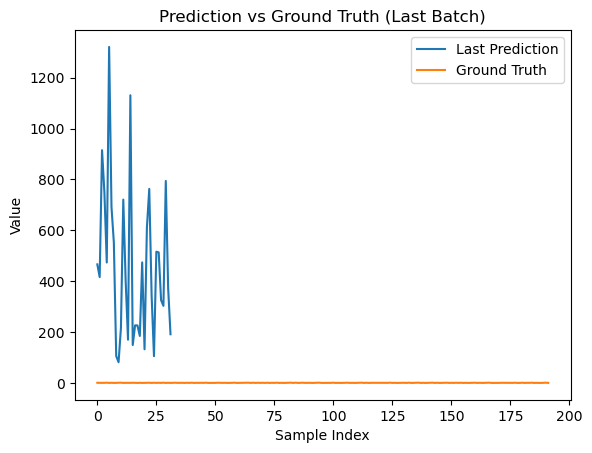

In [63]:
# Assuming 'log' contains the logged predictions and ground truths
last_output, last_ground_truth = log[0]

# Convert the predictions and ground truth to NumPy arrays
# Flatten them if needed (to make plotting easier)
last_output_flat = last_output.cpu().numpy().flatten()  # Flatten the prediction tensor
last_ground_truth_flat = last_ground_truth.cpu().numpy().flatten()  # Flatten the ground truth tensor

# Plot the last prediction against the ground truth
plt.plot(last_output_flat, label="Last Prediction")
plt.plot(last_ground_truth_flat, label="Ground Truth")
plt.legend()
plt.title("Prediction vs Ground Truth (Last Batch)")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.show()